Topic: model comparison (frequentist)

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import scipy.stats
import pylab as plt
from matplotlib import pyplot as plt
from scipy import stats
import random
import math
import sklearn
from sklearn.mixture import GaussianMixture

First, let's plot our dataset.

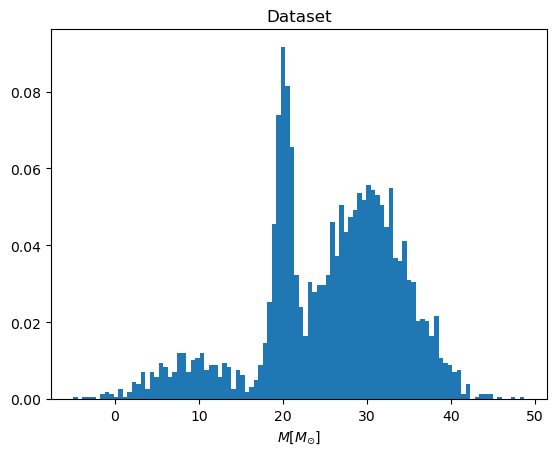

In [11]:
#plot of the data
data = np.load("formationchannels.npy")
a,b,c=plt.hist(data,100,density=True)
plt.xlabel(r"$M [M_{\odot}]$")
plt.title('Dataset')
plt.show()

It looks like our data has three different gaussian modes. Let's define a gaussian model and compute the AIC as a function of the number of modes in the model to see which one is preferred.

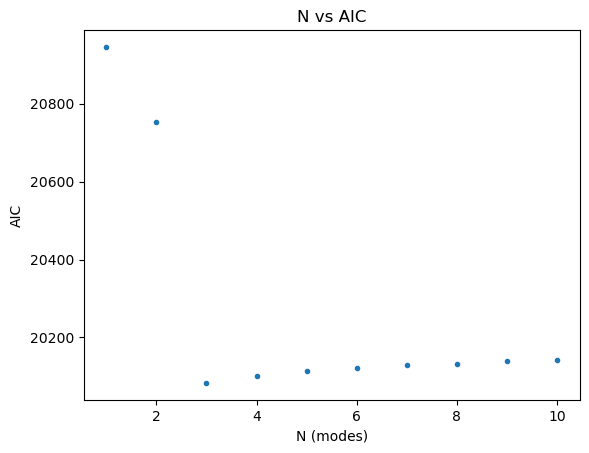

Minimum value for AIC: N = 3


In [12]:
aic = []
N = np.linspace(1,10,10,dtype=int)
for i in N:
    gm = GaussianMixture(n_components=i).fit(data)
    aic.append(gm.aic(data))
plt.plot(N,aic,'.')
plt.title('N vs AIC')
plt.xlabel('N (modes)')
plt.ylabel('AIC')
plt.show()
print('Minimum value for AIC: N =', N[np.array(aic)==np.min(np.array(aic))][0])

The AIC is minimum for $N=3$, therefore we conclude that our data is given by the superposition of three gaussians. Let's fit our data with this model.

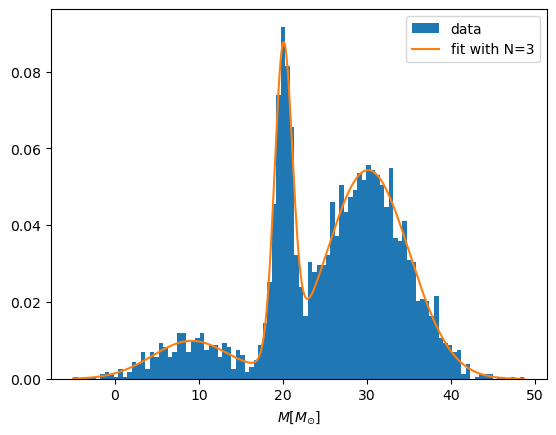

In [13]:
#compare the best fit with the initial data
a,b,c=plt.hist(data,100,density=True,label='data')
gm = GaussianMixture(n_components=N[np.array(aic)==np.min(np.array(aic))][0]).fit(data)
x_plot = np.linspace(np.min(data),np.max(data),1000)
plt.plot(x_plot,np.exp(gm.score_samples(x_plot[:,np.newaxis])),label='fit with N=3')
plt.legend()
plt.xlabel(r"$M [M_{\odot}]$")
plt.show()

Now, we want to visualize the three modes separately.

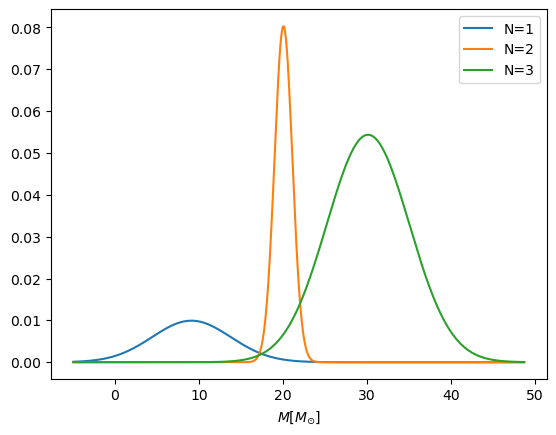

In [14]:
a = gm.predict_proba(x_plot[:,np.newaxis])                                          # tells me how much a data contributes to each gaussian
plt.plot(x_plot,a[:,2]*np.exp(gm.score_samples(x_plot[:,np.newaxis])),label='N=1')  # I multiply the fit by the weights computed in the previous line
plt.plot(x_plot,a[:,1]*np.exp(gm.score_samples(x_plot[:,np.newaxis])),label='N=2')
plt.plot(x_plot,a[:,0]*np.exp(gm.score_samples(x_plot[:,np.newaxis])),label='N=3')
plt.legend()
plt.xlabel(r"$M [M_{\odot}]$")
plt.show()

Probability of mode $j$ for each value $x_i$: \
$p(j|x_i)=\frac{\alpha_jN(\mu_j,\sigma_j)}{\sum_{j=1}^{N}\alpha_jN(\mu_j,\sigma_j)}$